In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from nb_import import *

In [4]:
import tools

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from openTSNE import TSNE

In [7]:
from openTSNE import affinity, initialization

In [8]:
from fa2 import ForceAtlas2

# MNIST-2K

<table>
    <tr>
        <th># of samples</th>
        <th># of classes</th>
        <th>dimensions</th>
    </tr>
    <tr>
        <td>1797</td>
        <td>10</td>
        <td>64</td>
    </tr>
</table>


In [9]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-2k')

## compute opentsne

In [24]:
res_tsne = []
tsne = TSNE(n_jobs=8,
            initialization='pca',
            callbacks=lambda it, err, emb: res_tsne.append((it, err)),
            callbacks_every_iters=1,
           )

In [25]:
%time embd_tsne_mnist2k = tsne.fit(X_train)

CPU times: user 5min 23s, sys: 19.1 s, total: 5min 42s
Wall time: 48 s


## compute fa2

In [16]:
%time affinities_N = affinity.PerplexityBasedNN(X_train)

CPU times: user 3.68 s, sys: 103 ms, total: 3.79 s
Wall time: 2.51 s


In [17]:
%time init_pca = initialization.pca(X_train, random_state=42)

CPU times: user 41 ms, sys: 525 µs, total: 41.5 ms
Wall time: 10.8 ms


In [18]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [19]:
%time fa2_pos_1k_mnist2k = forceatlas2.forceatlas2(affinities_N.P, pos=init_pca, iterations=1000)

100%|██████████| 1000/1000 [00:18<00:00, 48.54it/s]

BarnesHut Approximation  took  9.18  seconds
Repulsion forces  took  7.26  seconds
Gravitational forces  took  0.09  seconds
Attraction forces  took  1.62  seconds
AdjustSpeedAndApplyForces step  took  0.37  seconds
CPU times: user 20.1 s, sys: 93.7 ms, total: 20.2 s
Wall time: 19.6 s


In [20]:
%time fa2_pos_10k_mnist2k = forceatlas2.forceatlas2(affinities_N.P, pos=init_pca, iterations=10000)

100%|██████████| 10000/10000 [03:05<00:00, 53.79it/s]

BarnesHut Approximation  took  89.57  seconds
Repulsion forces  took  72.88  seconds
Gravitational forces  took  0.81  seconds
Attraction forces  took  15.10  seconds
AdjustSpeedAndApplyForces step  took  3.52  seconds
CPU times: user 3min 6s, sys: 802 ms, total: 3min 7s
Wall time: 3min 6s


In [21]:
fa2_pos_1k_mnist2k = np.array(fa2_pos_1k_mnist2k)
fa2_pos_10k_mnist2k = np.array(fa2_pos_10k_mnist2k)

## plots

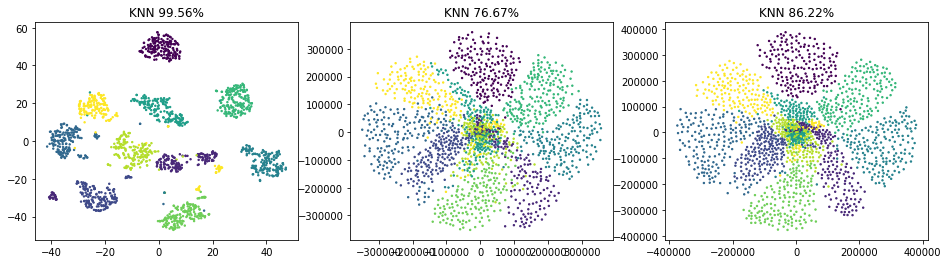

In [22]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

plt_options = {'s':2, 'rasterized':True}

for i, data in enumerate([embd_tsne_mnist2k, fa2_pos_1k_mnist2k, fa2_pos_10k_mnist2k]):

    ax[i].scatter(data[:,0], data[:,1], c=y_train, **plt_options)
    
    knn = tools.K_NN_classifier(data, y_train)
    _=ax[i].set_title("KNN {:.2f}%".format(knn*100))


Text(0.5, 1.0, 'KL 0.78')

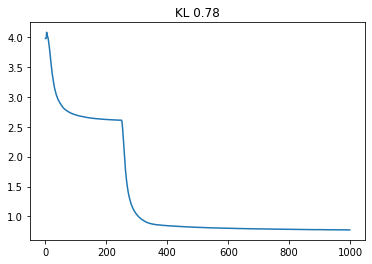

In [26]:
fig, ax = plt.subplots()
res_tsne = np.array(res_tsne)

ax.plot(res_tsne[:,1])
ax.set_title("KL {:.2f}".format(res_tsne[-1,1]))

# MNIST-70K

<table>
    <tr>
        <th># of samples</th>
        <th># of classes</th>
        <th>dimensions</th>
    </tr>
    <tr>
        <td>70000</td>
        <td>10</td>
        <td>784</td>
    </tr>
</table>


In [27]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-70k')

## compute opentsne

In [31]:
res_tsne_mnist70k = []
tsne = TSNE(n_jobs=8,
            initialization='pca',
            callbacks=lambda it, err, emb: res_tsne_mnist70k.append((it, err)),
            callbacks_every_iters=1,
           )

In [32]:
%time embd_tsne_mnist70k = tsne.fit(X_train)

CPU times: user 21min 11s, sys: 37.7 s, total: 21min 49s
Wall time: 3min 35s


## compute fa2

In [33]:
%time affinities_N = affinity.PerplexityBasedNN(X_train)

CPU times: user 2min 35s, sys: 2.65 s, total: 2min 37s
Wall time: 1min 26s


In [34]:
%time init_pca = initialization.pca(X_train, random_state=42)

CPU times: user 5.91 s, sys: 408 ms, total: 6.31 s
Wall time: 1.84 s


In [35]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [59]:
%time fa2_pos_1k_mnist70k = forceatlas2.forceatlas2(affinities_N.P, pos=init_pca, iterations=1 000)

100%|██████████| 1000/1000 [32:03<00:00,  1.85s/it]

BarnesHut Approximation  took  710.49  seconds
Repulsion forces  took  970.71  seconds
Gravitational forces  took  2.80  seconds
Attraction forces  took  213.78  seconds
AdjustSpeedAndApplyForces step  took  13.59  seconds
CPU times: user 32min 20s, sys: 13.4 s, total: 32min 34s
Wall time: 32min 27s


In [36]:
# fa2_pos_1k_mnist70k = np.array(fa2_pos_1k_mnist70k)
# np.save('fa2_pos_1k_mnist70k', fa2_pos_1k_mnist70k)
fa2_pos_1k_mnist70k = np.load('./fa2_pos_1k_mnist70k.npy')

In [37]:
# TOO SLOW
#%time fa2_pos_10k = forceatlas2.forceatlas2(affinities_N.P, pos=init_pca, iterations=10000)

## plots

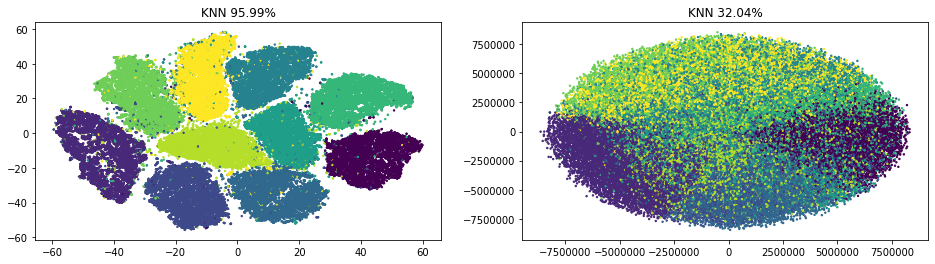

In [38]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

plt_options = {'s':2, 'rasterized':True}

for i, data in enumerate([embd_tsne_mnist70k, fa2_pos_1k_mnist70k]):#, fa2_pos_10k_mnist70k]):

    ax[i].scatter(data[:,0], data[:,1], c=y_train, **plt_options)
    
    knn = tools.K_NN_classifier(data, y_train)
    _=ax[i].set_title("KNN {:.2f}%".format(knn*100))

Text(0.5, 1.0, 'KL 3.16')

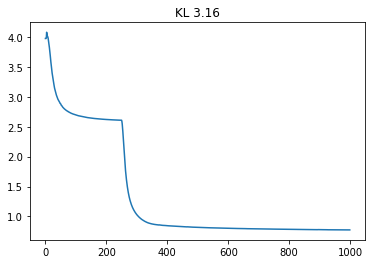

In [39]:
fig, ax = plt.subplots()
res_tsne_mnist70k = np.array(res_tsne_mnist70k)

ax.plot(res_tsne[:,1])
ax.set_title("KL {:.2f}".format(res_tsne_mnist70k[-1,1]))

# MNIST-70K root N

In [40]:
(X_train, y_train, X_test, y_test) = tools.get_dataset('mnist-70k')

## sample root N

In [41]:
N = X_train.shape[0]
rootN = np.int(np.sqrt(N))
rootN_ids = np.random.choice(N, size=rootN, replace=False)
rootN_data = X_train[rootN_ids]

## compute opentsne

In [51]:
res_tsne_mnist70k_rootN = []
tsne = TSNE(n_jobs=8,
            initialization='pca',
            callbacks=lambda it, err, emb: res_tsne_mnist70k_rootN.append((it, err)),
            callbacks_every_iters=1,
           )

In [52]:
%time embd_tsne_mnist70k_rootN = tsne.fit(rootN_data)

CPU times: user 1min 24s, sys: 5 s, total: 1min 29s
Wall time: 14.8 s


## compute fa2

In [46]:
%time init_pca = initialization.pca(rootN_data, random_state=42)

CPU times: user 45.3 ms, sys: 345 µs, total: 45.7 ms
Wall time: 13.5 ms


In [47]:
%time affinities_rootN = affinity.PerplexityBasedNN(rootN_data)

CPU times: user 2.06 s, sys: 0 ns, total: 2.06 s
Wall time: 2.02 s


In [48]:
# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=2.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [53]:
%time fa2_pos_1k_mnist70k_rootN = forceatlas2.forceatlas2(affinities_rootN.P, pos=init_pca, iterations=1000)

100%|██████████| 1000/1000 [00:01<00:00, 977.67it/s]

BarnesHut Approximation  took  0.23  seconds
Repulsion forces  took  0.47  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.21  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds
CPU times: user 1.12 s, sys: 323 µs, total: 1.12 s
Wall time: 1.12 s


In [69]:
%time fa2_pos_10k_mnist70k_rootN = forceatlas2.forceatlas2(affinities_rootN.P, pos=init_pca, iterations=10000)

100%|██████████| 10000/10000 [00:11<00:00, 876.26it/s]

BarnesHut Approximation  took  3.37  seconds
Repulsion forces  took  4.79  seconds
Gravitational forces  took  0.11  seconds
Attraction forces  took  2.07  seconds
AdjustSpeedAndApplyForces step  took  0.54  seconds
CPU times: user 11.5 s, sys: 52.6 ms, total: 11.6 s
Wall time: 11.5 s


In [70]:
fa2_pos_1k_mnist70k_rootN = np.array(fa2_pos_1k_mnist70k_rootN)
fa2_pos_10k_mnist70k_rootN = np.array(fa2_pos_10k_mnist70k_rootN)

## plots

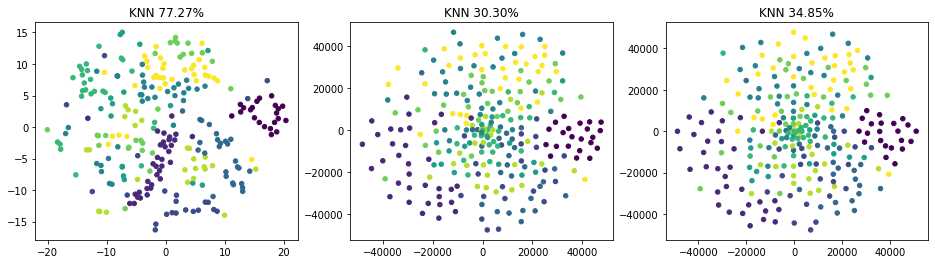

In [72]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

plt_options = {'s':20, 'rasterized':True}

for i, data in enumerate([embd_tsne_mnist70k_rootN, fa2_pos_1k_mnist70k_rootN, fa2_pos_10k_mnist70k_rootN]):

    ax[i].scatter(data[:,0], data[:,1], c=y_train[rootN_ids], **plt_options)
    
    knn = tools.K_NN_classifier(data, y_train[rootN_ids])
    _=ax[i].set_title("KNN {:.2f}%".format(knn*100))

Text(0.5, 1.0, 'KL 3.16')

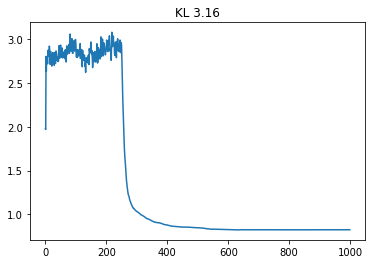

In [68]:
fig, ax = plt.subplots()
res_tsne_mnist70k_rootN = np.array(res_tsne_mnist70k_rootN)

ax.plot(res_tsne_mnist70k_rootN[:,1])
ax.set_title("KL {:.2f}".format(res_tsne_mnist70k[-1,1]))